## Các ví dụ cơ bản về Pandas

Notebook này sẽ hướng dẫn bạn qua một số khái niệm cơ bản về Pandas. Chúng ta sẽ bắt đầu bằng cách nhập các thư viện khoa học dữ liệu thông dụng:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dãy số

Dãy số giống như một danh sách hoặc mảng 1 chiều, nhưng có chỉ mục. Tất cả các thao tác đều được căn chỉnh theo chỉ mục.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Một trong những ứng dụng phổ biến của series là **chuỗi thời gian**. Trong chuỗi thời gian, chỉ mục có một cấu trúc đặc biệt - thường là một dãy các ngày hoặc thời điểm. Chúng ta có thể tạo một chỉ mục như vậy bằng `pd.date_range`.

Giả sử chúng ta có một series thể hiện số lượng sản phẩm được mua mỗi ngày, và chúng ta biết rằng vào mỗi Chủ nhật, chúng ta cũng cần lấy một món cho chính mình. Đây là cách mô phỏng điều đó bằng cách sử dụng series:


Length of index is 366


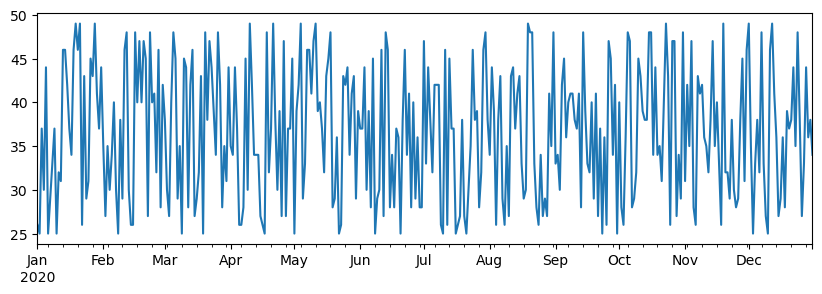

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Như bạn có thể thấy, chúng tôi đang gặp vấn đề ở đây, vì trong chuỗi hàng tuần, các ngày không được đề cập được coi là thiếu (`NaN`), và việc cộng `NaN` với một số sẽ cho ra `NaN`. Để có kết quả chính xác, chúng ta cần chỉ định `fill_value` khi cộng các chuỗi:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


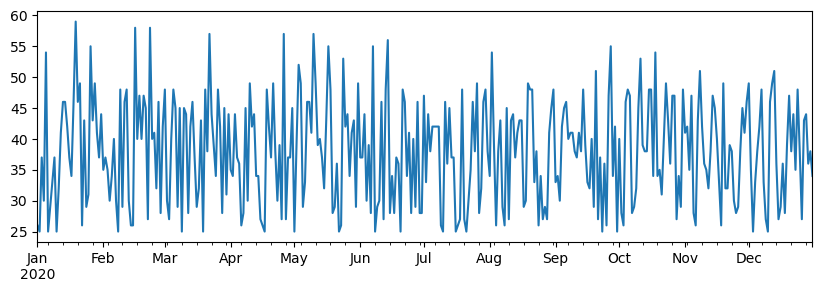

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

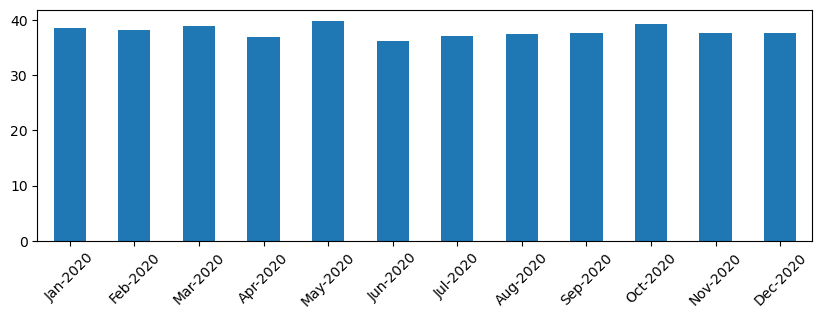

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Một dataframe về cơ bản là một tập hợp các series có cùng chỉ số. Chúng ta có thể kết hợp nhiều series lại với nhau để tạo thành một dataframe. Với các series `a` và `b` đã được định nghĩa ở trên:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Chúng ta cũng có thể sử dụng Series làm cột và chỉ định tên cột bằng cách sử dụng từ điển:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Kết quả tương tự có thể đạt được bằng cách hoán vị (và sau đó đổi tên các cột để khớp với ví dụ trước):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Chọn cột** từ DataFrame có thể được thực hiện như sau:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Chọn các hàng** dựa trên biểu thức lọc:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Cách hoạt động là biểu thức `df['A']<5` trả về một chuỗi boolean, cho biết biểu thức là `True` hay `False` đối với từng phần tử của chuỗi. Khi chuỗi được sử dụng làm chỉ mục, nó trả về tập con các hàng trong DataFrame. Do đó, không thể sử dụng biểu thức boolean Python tùy ý, ví dụ, viết `df[df['A']>5 and df['A']<7]` sẽ sai. Thay vào đó, bạn nên sử dụng phép toán đặc biệt `&` trên chuỗi boolean:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Tạo các cột có thể tính toán mới**. Chúng ta có thể dễ dàng tạo các cột có thể tính toán mới cho DataFrame của mình bằng cách sử dụng các biểu thức trực quan. Đoạn mã dưới đây tính độ lệch của A so với giá trị trung bình của nó.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Điều thực sự xảy ra là chúng ta đang tính một chuỗi, sau đó gán chuỗi này cho phía bên trái, tạo ra một cột khác.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Chọn các hàng dựa trên số** có thể được thực hiện bằng cách sử dụng cấu trúc `iloc`. Ví dụ, để chọn 5 hàng đầu tiên từ DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Nhóm** thường được sử dụng để đạt được kết quả tương tự như *bảng tổng hợp* trong Excel. Giả sử chúng ta muốn tính giá trị trung bình của cột `A` cho mỗi giá trị của `LenB`. Khi đó, chúng ta có thể nhóm DataFrame của mình theo `LenB`, và gọi `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Nếu chúng ta cần tính trung bình và số lượng phần tử trong nhóm, thì chúng ta có thể sử dụng hàm `aggregate` phức tạp hơn:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## In ấn và Vẽ đồ thị

Nhà khoa học dữ liệu thường phải khám phá dữ liệu, vì vậy việc có thể trực quan hóa dữ liệu là rất quan trọng. Khi DataFrame lớn, nhiều lúc chúng ta chỉ muốn đảm bảo rằng mọi thứ đang được thực hiện đúng bằng cách in ra vài dòng đầu tiên. Điều này có thể thực hiện bằng cách gọi `df.head()`. Nếu bạn chạy nó từ Jupyter Notebook, nó sẽ in ra DataFrame dưới dạng bảng rất đẹp.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Chúng ta cũng đã thấy cách sử dụng hàm `plot` để trực quan hóa một số cột. Mặc dù `plot` rất hữu ích cho nhiều tác vụ và hỗ trợ nhiều loại biểu đồ khác nhau thông qua tham số `kind=`, bạn luôn có thể sử dụng thư viện `matplotlib` gốc để vẽ những biểu đồ phức tạp hơn. Chúng ta sẽ tìm hiểu chi tiết về trực quan hóa dữ liệu trong các bài học riêng của khóa học.


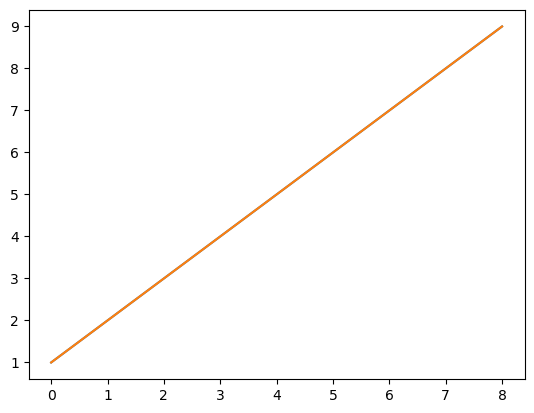

In [61]:
df['A'].plot()
plt.show()

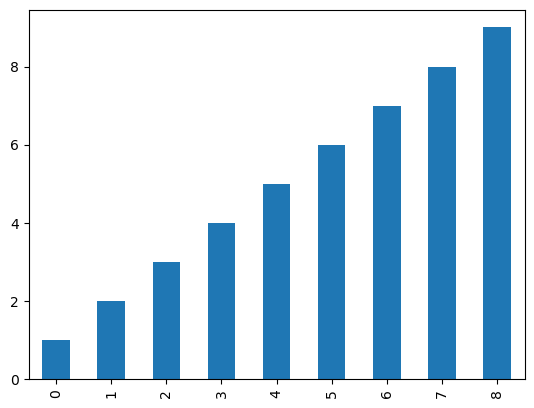

In [63]:
df['A'].plot(kind='bar')
plt.show()

Tổng quan này bao quát hầu hết các khái niệm quan trọng của Pandas, tuy nhiên, thư viện này rất phong phú và không có giới hạn cho những gì bạn có thể làm với nó! Bây giờ, hãy áp dụng kiến thức này để giải quyết một vấn đề cụ thể.



---

**Tuyên bố miễn trừ trách nhiệm**:  
Tài liệu này đã được dịch bằng dịch vụ dịch thuật AI [Co-op Translator](https://github.com/Azure/co-op-translator). Mặc dù chúng tôi cố gắng đảm bảo độ chính xác, xin lưu ý rằng các bản dịch tự động có thể chứa lỗi hoặc không chính xác. Tài liệu gốc bằng ngôn ngữ bản địa nên được coi là nguồn tham khảo chính thức. Đối với các thông tin quan trọng, nên sử dụng dịch vụ dịch thuật chuyên nghiệp từ con người. Chúng tôi không chịu trách nhiệm cho bất kỳ sự hiểu lầm hoặc diễn giải sai nào phát sinh từ việc sử dụng bản dịch này.
